In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.layers import UpSampling2D, MaxPooling2D, Flatten
import cv2
import os
import random
from tqdm import tqdm
import numpy as np
from keras.preprocessing import image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install tqdm

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

In [4]:

temp = []

In [5]:
def get_data(folder_path):
#     temp = []
    temp = []
    features = []
    X = []
    try:
        for img in tqdm(os.listdir(folder_path)):
            img = image.load_img(os.path.join(folder_path, img), target_size=(128, 128, 3))
            img_array = image.img_to_array(img)
            img_array /= 255.
#             resize_array = cv2.resize(img_array, (128,128))
            temp.append(img_array)
    except:
        pass
#     for i in temp:
#         features.append(i)
#     X = np.array(temp).reshape(-1, 128, 128, 3)
#     X = X.astype('float32')
#     X /= 255
    return np.array(temp)

In [6]:
# test_ds = tf.keras.utils.image_dataset_from_directory(
#     directory = '/kaggle/input/re-polyvare-scaled/Re-polyvare-scaled',
#     labels=None,
#     label_mode=None,
#     batch_size=32,
#     image_size=(128,128)
# )

In [7]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [8]:
for file in os.listdir('/kaggle/input/re-polyvare/Re-PolyVore'):
    if file in ['pants', 'shoes', 'outwear']:
        print(file)
        X = get_data(os.path.join('/kaggle/input/re-polyvare/Re-PolyVore', file))
#         print(X)
        print(X.shape)
        input_shape = (128,128,3)
        input_img = Input(shape=input_shape)
        x = Conv2D(496, (3,3), padding='same', activation='relu')(input_img)
#         x = keras.layers.LeakyReLU()(x)
        x = MaxPooling2D((2,2))(x)
        x = Conv2D(248, (3, 3), padding='same', activation='relu')(x)
#         x = keras.layers.LeakyReLU()(x)
        x = MaxPooling2D((2,2))(x)
        x = Conv2D(124, (3,3), padding='same', activation='relu')(x)
#         x = keras.layers.LeakyReLU()(x)
        x = MaxPooling2D((2,2))(x)
        x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
#         x = keras.layers.LeakyReLU()(x)
#         x = MaxPooling2D((2,2))(x)
#         x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
# #         x = keras.layers.LeakyReLU()(x)
#         x = MaxPooling2D((2,2))(x)
#         x = Conv2D(16, (3,3), padding='same', activation='relu')(x)
# #         x = keras.layers.LeakyReLU()(x)
#         x = MaxPooling2D((2,2))(x)
        encoded = Conv2D(16, (3,3), padding='same', activation='relu')(x)
#         x = keras.layers.LeakyReLU()(x)
#         x = MaxPooling2D((2,2), padding='same')(x)
#         x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
#         encoded = x
#         encoded = MaxPooling2D((2,2))(x)
#         encoded = Flatten()(x)
        
        
#         x = Conv2D(16, (3,3), padding='same', activation='relu')(encoded)
# #         x = keras.layers.LeakyReLU()(x)
#         x = UpSampling2D((2,2))(x)
       
#         x = Conv2D(16, (3,3), padding='same', activation='relu')(encoded)
# #         x = keras.layers.LeakyReLU()(x)
#         x = UpSampling2D((2,2))(x)
      
#         x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
# #         x = keras.layers.LeakyReLU()(x)
#         x = UpSampling2D((2,2))(x)
        
        x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
#         x = keras.layers.LeakyReLU()(x)
        x = UpSampling2D((2,2))(x)
       
        x = Conv2D(124, (3,3), padding='same', activation='relu')(encoded)
#         x = keras.layers.LeakyReLU()(x)
        x = UpSampling2D((2,2))(x)
       
        x = Conv2D(248, (3,3), padding='same', activation='relu')(x)
#         x = keras.layers.LeakyReLU()(x)
        x = UpSampling2D((2,2))(x)

        x = Conv2D(496, (3,3), padding='same', activation='relu')(x)
#         x = keras.layers.LeakyReLU()(x)
        x = UpSampling2D((2,2))(x)
#           x = Conv2D(256, (3,3), padding='same', activation='relu')(x)
#         x = UpSampling2D((1,1))(x)
#         x = Conv2D(512, (3,3), padding='same', activation='relu')(x)
#         x = UpSampling2D((2,2))(x)
#         x = Conv2D(128, (3,3), padding='same', activation='relu')(input_img)
        decoded = Conv2D(3, (3,3), padding='same')(x)
        encoder = Model(input_img, encoded)
        autoencoder = Model(input_img, decoded)
        autoencoder.compile(optimizer='adam', loss='mse')
        autoencoder.summary()
        autoencoder.fit(X,X, validation_split=0.2, epochs=300)
#         del (autoencoder)
#         del (encoder)
        break

outwear


 78%|███████▊  | 7915/10170 [01:16<00:21, 104.08it/s]


(7915, 128, 128, 3)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 496)     13888     
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 496)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 248)       1107320   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 248)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32,

In [9]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     directory = '/kaggle/input/re-polyvare-scaled/Re-polyvare-scaled',
#     labels=None,
#     label_mode=None,
#     batch_size=32,
#     image_size=(256,256)
# )

In [ ]:
train_ds

In [24]:
def get_data_single(folder_path):
#     temp = []
    temp = []
    
    features = []
    X = []
    try:
#         for img in tqdm(os.listdir(folder_path)):
        img = image.load_img(os.path.join(folder_path), target_size=(128, 128, 3))
        img_array = image.img_to_array(img)
        img_array /= 255.
#             resize_array = cv2.resize(img_array, (128,128))
        temp.append(img_array)
    except:
        pass
#     for i in temp:
#         features.append(i)
#     X = np.array(temp).reshape(-1, 128, 128, 3)
#     X = X.astype('float32')
#     X /= 255
    return np.array(temp).reshape(-1, 128, 128, 3)

In [25]:
encoder = Model(input_img, encoded)

In [26]:
get_data_single('/kaggle/input/dress-pic/dress.jpg')

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [27]:
pred = encoder(get_data_single('/kaggle/input/dress-pic/dress.jpg'))

In [28]:
pred_2 =  autoencoder(get_data_single('/kaggle/input/dress-pic/dress.jpg'))

In [29]:
pred_2

<tf.Tensor: shape=(1, 128, 128, 3), dtype=float32, numpy=
array([[[[0.99505055, 0.990693  , 0.9930529 ],
         [1.0005423 , 0.9969844 , 0.99908566],
         [1.0007399 , 0.9984836 , 1.0010961 ],
         ...,
         [1.0020734 , 1.0014937 , 1.0015975 ],
         [1.0031385 , 1.0015035 , 1.0041517 ],
         [0.99912393, 0.99937695, 0.9984168 ]],

        [[1.0028352 , 0.9977105 , 1.0011568 ],
         [1.0069401 , 1.0017836 , 1.006161  ],
         [1.0044285 , 1.0005906 , 1.0034177 ],
         ...,
         [1.0040154 , 0.9997363 , 1.0027393 ],
         [1.0035933 , 1.0015894 , 1.0052007 ],
         [1.0024347 , 0.99955696, 1.0041949 ]],

        [[1.0004231 , 0.99603915, 1.0006667 ],
         [1.0006824 , 0.9989473 , 1.0023553 ],
         [0.9984025 , 0.995815  , 0.9998719 ],
         ...,
         [1.0035934 , 1.001214  , 1.0027306 ],
         [1.0056726 , 1.0024048 , 1.0050279 ],
         [1.0011461 , 0.998848  , 0.9993505 ]],

        ...,

        [[0.9972515 , 0.9948279 , 

In [30]:
pred.numpy()

array([[[[6.10362925e-02, 0.00000000e+00, 1.41373903e-01, ...,
          5.38238525e-01, 0.00000000e+00, 0.00000000e+00],
         [6.55739009e-02, 1.51422098e-02, 1.64013281e-01, ...,
          7.25374699e-01, 2.13615242e-02, 0.00000000e+00],
         [7.79838711e-02, 2.12057494e-02, 1.71954408e-01, ...,
          7.49885321e-01, 3.64601314e-02, 0.00000000e+00],
         ...,
         [7.40042999e-02, 2.06917450e-02, 1.77311212e-01, ...,
          7.54735947e-01, 3.83782014e-02, 0.00000000e+00],
         [6.33935854e-02, 1.64513886e-02, 1.70207337e-01, ...,
          7.42059529e-01, 3.25218439e-02, 0.00000000e+00],
         [6.98371604e-02, 0.00000000e+00, 1.35313317e-01, ...,
          5.95238209e-01, 6.25199303e-02, 1.46128938e-01]],

        [[6.37961552e-02, 1.53157711e-02, 1.26042277e-01, ...,
          7.51379728e-01, 3.56689170e-02, 0.00000000e+00],
         [5.92294596e-02, 1.50236748e-02, 1.55994490e-01, ...,
          9.86328900e-01, 3.03183608e-02, 0.00000000e+00],
        

In [31]:
# pred = pred[0,:,:,0]
pred_2 = pred_2[0,:,:,:]

In [32]:
pred = pred[0,:,:,0]

In [33]:
# pred = pred.numpy()
pred_2 = pred_2.numpy()

In [34]:
pred = pred.numpy()

In [35]:
pred_2.shape

(128, 128, 3)

In [ ]:
# pred = (255 * pred).astype('uint8')
pred_2 = (255 * pred_2).astype('uint8')
# pred_2 = pred_2.reshape(pred_2.shape[0], pred_2.shape[0], 3)

In [ ]:
pred_2

In [ ]:
pred = (255 * pred).astype('uint8')

In [36]:
pred.shape

(16, 16)

In [37]:
encoded

<KerasTensor: shape=(None, 16, 16, 16) dtype=float32 (created by layer 'conv2d_4')>

In [38]:
import matplotlib.pyplot as plt

In [ ]:

cv2.imshow(pred_2)

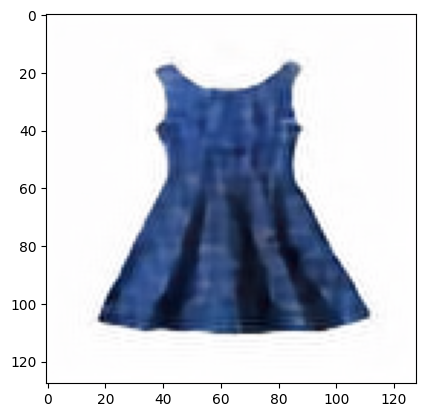

In [39]:
plt.imshow(pred_2)
# plt.show()
